# Record Cleaning

**Metadata Summary**  
- 📅 **Date of Retrieval:** JULY 1, 2025  
- 🌐 **Source of Data:** LGU San Jacinto Treasury Records
- 📄 **License/Permission:**  
- 🧑‍💼 **Prepared by:** MARK JUNE E. ALMOJUELA

# PREPARATIONS

In [255]:
# Initial Library Import
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [256]:
# File Exploration
data_dir_path = "../../dataset/raw/"
source_folder = "compiled"

# Map month prefixes to their numeric order
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

try:
    years = [year for year in os.listdir(data_dir_path) if os.path.isdir(os.path.join(data_dir_path, year))]
    print("Available years:", years, '\n')

    for year in years:
        try:
            folder_path = os.path.join(data_dir_path, year, source_folder)
            csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

            # Sort by mapped month order using the first 3 characters
            sorted_files = sorted(
                csv_files,
                key=lambda x: month_map.get(x[:3].upper(), 99)  # Defaults to end if unrecognized prefix
            )

            print(f"{year}: {sorted_files}; \nCOUNT: {len(sorted_files)}\n")

        except FileNotFoundError:
            continue
        except NotADirectoryError:
            print("Path is not a directory")
        except PermissionError:
            print("Permission denied")
        except Exception as e:
            print(f"An error occurred: {e}")

except Exception as e:
    print(f"An error occurred: {e}")

Available years: ['2020', '2021', '2022', '2023', '2024', '2025'] 

2020: ['JAN_2020.csv', 'FEB_2020.csv', 'MAR_2020.csv', 'MAR_APR_2020.csv', 'APR_2020.csv', 'MAY_2020.csv', 'JUN_2020.csv', 'JUL_2020.csv', 'AUG_2020.csv', 'SEP_2020.csv', 'OCT_2020.csv', 'NOV_2020.csv', 'DEC_2020.csv']; 
COUNT: 13

2022: ['JAN_2022.csv', 'FEB_2022.csv', 'MAR_2022.csv', 'APR_2022.csv', 'MAY_2022.csv', 'JUN_2022.csv', 'JUL_2022.csv', 'AUG_2022.csv', 'SEP_2022.csv', 'OCT_2022.csv', 'NOV_2022.csv', 'DEC_2022.csv']; 
COUNT: 12

2023: ['JAN_2023.csv', 'FEB_2023.csv', 'MAR_2023.csv', 'APR_2023.csv', 'MAY_2023.csv', 'JUN_2023.csv', 'JUL_2023.csv', 'AUG_2023.csv', 'SEP_2023.csv', 'OCT_2023.csv', 'DEC_2023.csv']; 
COUNT: 11

2024: ['JAN_2024.csv', 'FEB_2024.csv', 'MAR_2024.csv', 'APR_2024.csv', 'MAY_2024.csv', 'JUN_2024.csv', 'JUL_2024.csv', 'AUG_2024.csv', 'SEP_2024.csv', 'OCT_2024.csv', 'NOV_2024.csv', 'DEC_2024.csv']; 
COUNT: 12

2025: ['JAN_2025.csv', 'FEB_2025.csv', 'MAR_2025.csv', 'APR_2025.csv', 'MAY_2025

# INITIAL NORMALIZATION

In [8]:
# Initialization
%pip install dash 
%pip install missingno
%pip install dash-bootstrap-components

import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import re
import os
from dash import dcc, html, dash_table
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import missingno as msno
from dash.dependencies import Input, Output
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt

import dash_bootstrap_components as dbc


# NOTE: Run this cell only once

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


# Standardize the column names

In [257]:
from pathlib import Path
import re

source_folder = 'compiled'
output_dir = 'preprocessed'
source_dir = 'raw'

source_dir = Path(f"../../dataset/{source_dir}")
output_dir = Path(f"../../dataset/{output_dir}")
years = os.listdir(source_dir)

distinct_columns = set()
new_columns = {'Consumer\'s Name': 'Account Name', 'Water Meter Serial #': 'Meter Serial Number', 'Meter Serial No.': 'Meter Serial Number',
                'Present': 'Present Reading', 'Previous': 'Previous Reading', 'Consumption': 'Consumption', 'Status': 'Connection Status',
                'Address': 'Service Address', 'Type': 'Connection Type', 'Cons.': 'Consumption', 'Amount': 'Bill Amount', 'Control No.': 'Control Number'}
valid_columns = ['Consumption', 'Control Number', 'Account Name', 'Service Address', 'Present Reading', 'Connection Status', 'Bill Amount', 'Connection Type', 'Meter Serial Number', 'Previous Reading']

for year in years:
    try:
        files = os.listdir(source_dir / year / source_folder)
        os.makedirs(output_dir / year, exist_ok=True)
        for file in files:
            if not re.fullmatch(r'^[A-Z]{3}_[A-Z]{3}_\d{4}\.csv', file):
                df = pd.read_csv(source_dir / year / source_folder / file, encoding='latin1')
                df.columns = df.columns.str.strip()
                df.rename(columns=new_columns, inplace=True)
                distinct_columns.update(df.columns)

                if df.columns.isin(valid_columns).all():
                    cutoff = file.find(".csv")
                    df.to_csv(output_dir / year / f'{file[:cutoff]}_preprocessed.csv', index=False)
    except FileNotFoundError:
        continue

for col in distinct_columns:
    print(col)


Consumption
Control Number
Account Name
Service Address
Present Reading
Connection Status
Bill Amount
Connection Type
Meter Serial Number
Previous Reading


In [258]:
# Drop the old preprocessed files
source_dir = 'preprocessed'
source_dir = Path(f"../../dataset/{source_dir}")


for year in years:
    try:
        files = os.listdir(source_dir / year)
        for file in files:
            if re.fullmatch(r'^[A-Z]{3}\d{4}_preprocessed.csv', file) or re.fullmatch(r'^[A-Z]{3}_\d{4}\.csv_\d{4}_preprocessed.csv$', file):
                os.remove(source_dir / year / file)
    except FileNotFoundError:
        continue

In [259]:
year = "2020"
source_dir = Path(f"../../dataset/preprocessed/{year}")

files = os.listdir(source_dir)
files.sort()

for file in files:
    print(file)
    df = pd.read_csv(source_dir / file)
    display(df.info())

APR_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Control Number       1632 non-null   float64
 1   Account Name         1633 non-null   object 
 2   Service Address      1633 non-null   object 
 3   Meter Serial Number  935 non-null    object 
 4   Previous Reading     1633 non-null   int64  
 5   Present Reading      1633 non-null   int64  
 6   Consumption          1633 non-null   int64  
 7   Bill Amount          1633 non-null   int64  
 8   Connection Status    1633 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 114.9+ KB


None

AUG_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1629 non-null   int64  
 1   Account Name      1629 non-null   object 
 2   Service Address   1629 non-null   object 
 3   Previous Reading  1568 non-null   object 
 4   Present Reading   1304 non-null   object 
 5   Consumption       1492 non-null   float64
 6   Bill Amount       1257 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 89.2+ KB


None

DEC_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1566 non-null   float64
 1   Account Name      1575 non-null   object 
 2   Service Address   1575 non-null   object 
 3   Previous Reading  1469 non-null   object 
 4   Present Reading   650 non-null    object 
 5   Consumption       835 non-null    float64
 6   Bill Amount       639 non-null    float64
dtypes: float64(3), object(4)
memory usage: 86.3+ KB


None

FEB_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1618 non-null   float64
 1   Account Name      1624 non-null   object 
 2   Service Address   1624 non-null   object 
 3   Previous Reading  1453 non-null   object 
 4   Present Reading   893 non-null    object 
 5   Consumption       1423 non-null   float64
 6   Bill Amount       1137 non-null   float64
dtypes: float64(3), object(4)
memory usage: 88.9+ KB


None

JAN_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1572 non-null   float64
 1   Account Name      1579 non-null   object 
 2   Service Address   1579 non-null   object 
 3   Previous Reading  1419 non-null   object 
 4   Present Reading   1338 non-null   object 
 5   Consumption       1503 non-null   float64
 6   Bill Amount       1200 non-null   float64
dtypes: float64(3), object(4)
memory usage: 86.5+ KB


None

JUL_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1630 non-null   int64  
 1   Account Name      1630 non-null   object 
 2   Service Address   1630 non-null   object 
 3   Previous Reading  1534 non-null   object 
 4   Present Reading   1241 non-null   object 
 5   Consumption       1477 non-null   float64
 6   Bill Amount       1242 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 89.3+ KB


None

JUN_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1629 non-null   float64
 1   Account Name      1630 non-null   object 
 2   Service Address   1630 non-null   object 
 3   Previous Reading  1579 non-null   object 
 4   Present Reading   1512 non-null   object 
 5   Consumption       1476 non-null   float64
 6   Bill Amount       1256 non-null   float64
dtypes: float64(3), object(4)
memory usage: 89.3+ KB


None

MAR_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1632 non-null   float64
 1   Account Name      1633 non-null   object 
 2   Service Address   1633 non-null   object 
 3   Previous Reading  1432 non-null   object 
 4   Present Reading   1230 non-null   object 
 5   Consumption       1525 non-null   float64
 6   Bill Amount       1217 non-null   float64
dtypes: float64(3), object(4)
memory usage: 89.4+ KB


None

MAY_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1634 non-null   float64
 1   Account Name      1637 non-null   object 
 2   Service Address   1637 non-null   object 
 3   Previous Reading  1464 non-null   object 
 4   Present Reading   1438 non-null   object 
 5   Consumption       1526 non-null   float64
 6   Bill Amount       1249 non-null   object 
dtypes: float64(2), object(5)
memory usage: 89.7+ KB


None

NOV_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1696 non-null   int64  
 1   Account Name      1696 non-null   object 
 2   Service Address   1696 non-null   object 
 3   Previous Reading  1680 non-null   object 
 4   Present Reading   1287 non-null   object 
 5   Consumption       1529 non-null   float64
 6   Bill Amount       1291 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 92.9+ KB


None

OCT_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1696 non-null   int64  
 1   Account Name      1696 non-null   object 
 2   Service Address   1696 non-null   object 
 3   Previous Reading  1686 non-null   object 
 4   Present Reading   1306 non-null   object 
 5   Consumption       1541 non-null   float64
 6   Bill Amount       1301 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 92.9+ KB


None

SEP_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1695 non-null   int64  
 1   Account Name      1695 non-null   object 
 2   Service Address   1695 non-null   object 
 3   Previous Reading  1676 non-null   object 
 4   Present Reading   1305 non-null   object 
 5   Consumption       1521 non-null   float64
 6   Bill Amount       1289 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 92.8+ KB


None

# Main Cleaning

In [260]:
# Explore unique values
unique_values = set()
base_dir_path = Path("../../dataset/preprocessed")
years = os.listdir(base_dir_path)
column_name = "Previous Reading"
should_filter_numeric = True

def is_numeric(value):
    try:
        float(str(value))
        return True
    except ValueError:
        return False

filtered_values = [v for v in unique_values if not is_numeric(v)]

for year in years:
    folder_path = Path("../../dataset/preprocessed") / year
    for file_path in folder_path.iterdir():
        if file_path.is_file() and file_path.suffix == ".csv":
            df = pd.read_csv(file_path)
            try:
                unique_values.update(df[column_name].unique())
            except KeyError:
                continue

filtered_values = [value for value in unique_values if not is_numeric(value)]
for address in sorted(map(str, filtered_values)):
    print(address)


 
  
 DISC
 DISC.
 Defect
-
CLOSED
CLOSED HOUSE
DEFECT
DEFET
DI16
DI80
DISC.
DiSC.
Disc
MOIST
NR
New Meter
T-CLOSE
T-DEFECT
T-Disc
TECH. DEFECT
TEMP. CLOSED
TEMP. DISC.
UNLOCATED METER
close
def
defect
diSC.
dis
disc.
moist
nm
nr
unlocated meter


In [261]:
# Dataset Cleaning Script: Billing Data Preprocessor
# Author: [Mark June Almojuela]
# Purpose: Detect anomalies, correct missing values, and export a cleaned dataset
# ----------------------------------------------------------------------------------

# Known Anomaly Codes (Reading Flags)
invalid_reading_codes = {
    'DE12': 'Invalid Reading',
    'NR': 'Invalid Reading',
    'DI61': 'Invalid Reading',
    'DI21': 'Invalid Reading',
    'DI43': 'Invalid Reading',
    'DI07': 'Invalid Reading',
    'DISC.': 'Disconnected',
    'DEFECT': 'Defect',
    'DEFET': 'Defect',
    'TEMP. CLOSED': 'Temporarily Closed',
    'DISC': 'Disconnected',
    'Defect': 'Defect',
    'CLOSED': 'Temporarily Closed',
    'CLOSED HOUSE': 'Temporarily Closed',
    'DI16': 'Disconnected',
    'DI80': 'Disconnected',
    'DiSC.': 'Disconnected',
    'Disc': 'Disconnected',
    'MOIST': 'Invalid Reading',
    'New Meter': 'New Meter',
    'T-CLOSE': 'Temporarily Closed',
    'T-DEFECT': 'Defect',
    'T-Disc': 'Disconnected',
    'TECH. DEFECT': 'Defect',
    'TEMP. DISC.': 'Disconnected',
    'UNLOCATED METER': 'Invalid Reading',
    'close': 'Temporarily Closed',
    'def': 'Defect',
    'defect': 'Defect',
    'diSC.': 'Disconnected',
    'dis': 'Disconnected',
    'disc': 'Disconnected',
    'disc.': 'Disconnected',
    'moist': 'Invalid Reading',
    'nm': 'Invalid Reading',
    'nr': 'Invalid Reading',
    'unlocated meter': 'Invalid Reading'
}

# Helper Function: Check if Value Is Numeric
def is_numeric(value):
    try:
        if pd.isna(value):
            return False
        float(value)
        return True
    except (ValueError, TypeError):
        return False

# Core Cleaning Function: Processes Raw Billing Data
def clean_billing_df(df):
    # Initialize output columns
    df["Cleaned Previous Reading"] = None
    df["Cleaned Present Reading"] = None
    df["Connection Status"] = None
    df["Record Status"] = None

    # Row-wise cleansing logic
    for index, row in df.iterrows():
        present_val = row["Present Reading"]
        previous_val = row["Previous Reading"]

        present = str(present_val) if pd.notna(present_val) else ""
        previous = str(previous_val) if pd.notna(previous_val) else ""

        # Case 1: Anomaly code detected in Present or Previous
        if present in invalid_reading_codes or previous in invalid_reading_codes:
            code = present if present in invalid_reading_codes else previous
            df.at[index, "Connection Status"] = invalid_reading_codes[code]

            # Retain usable numeric data if available
            if pd.isna(row["Previous Reading"]) and pd.isna(row["Present Reading"]):
                df.at[index, "Record Status"] = "Empty"
            else:
                df.at[index, "Record Status"] = "Corrected"
            
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"] if is_numeric(row["Previous Reading"]) else (
                row["Present Reading"] if is_numeric(row["Present Reading"]) else None)
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"] if is_numeric(row["Present Reading"]) else (
                row["Previous Reading"] if is_numeric(row["Previous Reading"]) else None)

            # Sanitize raw values for downstream use
            df.at[index, "Previous Reading"] = None if previous in invalid_reading_codes else row["Previous Reading"]
            df.at[index, "Present Reading"] = None if present in invalid_reading_codes else row["Present Reading"]

        # Case 2: Missing Present but valid Previous
        elif pd.isna(row["Present Reading"]) and is_numeric(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Previous Reading"]
            df.at[index, "Record Status"] = "Corrected"
            df.at[index, "Connection Status"] = "Active"

        # Case 3: Missing Previous but valid Present
        elif is_numeric(row["Present Reading"]) and pd.isna(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Present Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"]
            df.at[index, "Record Status"] = "Corrected"
            df.at[index, "Connection Status"] = "Active"

        # Case 4: Both values are valid and numeric
        elif is_numeric(row["Present Reading"]) and is_numeric(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"]
            df.at[index, "Record Status"] = "Unchanged"
            df.at[index, "Connection Status"] = "Active"

        # Case 5: Both values missing
        elif pd.isna(row["Present Reading"]) and pd.isna(row["Previous Reading"]):
            df.at[index, "Connection Status"] = "Unknown"
            df.at[index, "Cleaned Previous Reading"] = None
            df.at[index, "Cleaned Present Reading"] = None
            df.at[index, "Record Status"] = "Empty"

        # Case 6: Fallback condition
        else:
            df.at[index, "Connection Status"] = "Unknown"

        if pd.notna(row['Cleaned Previous Reading']) and pd.notna(row['Cleaned Present Reading']) and row['Cleaned Previous Reading'] > row['Cleaned Present Reading']:
            df.at[index, 'Record Status'] = 'Invalid'

        elif pd.isna(row['Cleaned Previous Reading']) and pd.isna(row['Cleaned Present Reading']):
            df.at[index, 'Record Status'] = 'Corrected'

    return df

def compute_consumption(df):
    # Ensure columns are numeric, converting non-numeric to NaN
    df["Cleaned Present Reading"] = pd.to_numeric(df["Cleaned Present Reading"], errors='coerce')
    df["Cleaned Previous Reading"] = pd.to_numeric(df["Cleaned Previous Reading"], errors='coerce')
    
    # Create a mask for valid records
    valid_mask = ~df['Record Status'].isin(['Invalid', 'Empty'])
    
    # Initialize the column with 0
    df["Cleaned Consumption"] = 0
    
    # Calculate consumption only for valid records where both values are not null
    mask = valid_mask & df["Cleaned Present Reading"].notna() & df["Cleaned Previous Reading"].notna()
    df.loc[mask, "Cleaned Consumption"] = (
        df.loc[mask, "Cleaned Present Reading"] - 
        df.loc[mask, "Cleaned Previous Reading"]
    )
    
    # Handle cases where consumption would be negative (which might indicate a meter reset)
    df.loc[df["Cleaned Consumption"] < 0, "Cleaned Consumption"] = 0
    
    return df

def add_month_year(df):
    df["Month"] = month
    df["Year"] = year
    df['Quarter'] = df['Month'].map({
        'JAN': 'Q1',
        'FEB': 'Q1',
        'MAR': 'Q1',
        'APR': 'Q2',
        'MAY': 'Q2',
        'JUN': 'Q2',
        'JUL': 'Q3',
        'AUG': 'Q3',
        'SEP': 'Q3',
        'OCT': 'Q4',
        'NOV': 'Q4',
        'DEC': 'Q4'
    })
    return df

def add_district(df):
    df['District'] = df['Service Address'].str.split(',').str[0].str.strip()
    return df

def standardize_connection_type(df):
    types = {
        'R': 'Residential',
        'I': 'Industrial',
        'C': 'Commercial'
    }
    df['Connection Type'] = df['Connection Type'].str.strip().str.upper().replace(types)
    return df

def change_dtype(df):
    df['Control Number'] = df['Control Number'].astype(object)
    df['Month'] = df['Month'].astype(str)
    df['Quarter'] = df['Quarter'].astype(str)
    df['Account Name'] = df['Account Name'].astype(str)
    df['Service Address'] = df['Service Address'].astype(str)
    df['Record Status'] = df['Record Status'].astype(str)
    df['Connection Status'] = df['Connection Status'].astype(str)

    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
    df['Cleaned Consumption'] = pd.to_numeric(df['Cleaned Consumption'], errors='coerce').astype(int)

    return df

# 📐 Desired Output Column Order (Report-Ready)
ordered_columns = [
    "Month",
    "Year",
    "Quarter",
    "Control Number",
    "Account Name",
    "Connection Type",
    "Service Address",
    "Previous Reading",
    "Present Reading",
    "Cleaned Previous Reading",
    "Cleaned Present Reading",
    "Cleaned Consumption",
    "Record Status",
    "Connection Status"
]

base_dir_path = Path("../../dataset/preprocessed")
output_dir_path = Path("../../dataset/clean/semi_clean")

years = os.listdir(base_dir_path)

# Paths and Filenames
for year in years:
    files = os.listdir(base_dir_path / year)
    os.makedirs(output_dir_path / year, exist_ok=True)
    for file in files:
        month = file[0:3].upper()
        file_path = base_dir_path / year / file
        output_dir = output_dir_path / year

        raw_df = pd.DataFrame()

        try:
            raw_df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                raw_df = pd.read_csv(file_path, encoding='utf-16')
            except UnicodeDecodeError:
                raw_df = pd.read_csv(file_path, encoding='latin1')

        # 🧼 Run Cleaning Logic
        cleaned_df = clean_billing_df(raw_df)
        cleaned_df = compute_consumption(cleaned_df)
        cleaned_df = add_month_year(cleaned_df)
        final_df = change_dtype(cleaned_df)

        # 🧾 Reorder Columns for Consistent Output
        final_columns = [col for col in ordered_columns if col in final_df.columns]
        ordered_cleaned_df = final_df[final_columns]

        # 👀 Preview Top 5 Cleaned Records
        print(f"\n📊 Cleaned Preview: {month} {year}")
        print(ordered_cleaned_df.head())

        # 📈 Status Summary
        print("\n🧾 Record Status Summary:")
        print(ordered_cleaned_df["Record Status"].value_counts())

        print("\n🧾 Dataset Shape: ")
        print(ordered_cleaned_df.shape)

        # 💾 Save Cleaned Dataset
        os.makedirs(output_dir, exist_ok=True)
        ordered_cleaned_df.to_csv(output_dir / f"{month}_{year}_semi_clean.csv", index=False)

        print(f"\n✅ Cleaned data exported successfully to: {output_dir}")

print("\n✅ All datasets cleaned and exported successfully!")


📊 Cleaned Preview: APR 2020
  Month  Year Quarter Control Number         Account Name Service Address  \
0   APR  2020      Q2       501549.0       Albaño, Lilane    Alicante St.   
1   APR  2020      Q2       500750.0  Aljecera, Marcelino    Alicante St.   
2   APR  2020      Q2       500990.0       Almiñana, Irus    Alicante St.   
3   APR  2020      Q2       500505.0       Almiñe, Edison    Alicante St.   
4   APR  2020      Q2       501542.0       Almiñe, Filben    Alicante St.   

   Previous Reading  Present Reading  Cleaned Previous Reading  \
0               232              247                       232   
1              3040             3051                      3040   
2               504              537                       504   
3                32               63                        32   
4              3293             3314                      3293   

   Cleaned Present Reading  Cleaned Consumption Record Status  \
0                      247                   1

# Dataset Merge-Fill

In [262]:
# Helper Function: Check for Duplicated Values
base_dir_path = Path("../../dataset/clean/semi_clean")

duplicated_values = set()

years = os.listdir(base_dir_path)
for year in years:
    files = os.listdir(base_dir_path / year)
    for file in files:
        df = pd.read_csv(base_dir_path / year / file)
        duplicated_values.update(df[df['Cleaned Present Reading']==' DISC.']['Account Name'].unique())

if duplicated_values:
    print("Duplicated Values:")
    for value in duplicated_values:
        print(value)
else:
    print("No duplicated values found.")


No duplicated values found.


In [ ]:
import pandas as pd
import os
from pathlib import Path

# Paths
base_dir_path = Path("../../dataset/clean/semi_clean")
output_dir_path = Path("../../dataset/clean/production")
years = os.listdir(base_dir_path)

# Mapping Dictionaries
districts = {
    'DIST. 1': 'District 1',
    'DIST. 2': 'District 2',
    'DIST. 3': 'District 3',
    'DIST. 4': 'District 4'
}

streets = {
    '0': 'Unknown',
    'ALICANTE ST.' : 'Alicante Street',
    'ALMONTE ST.': 'Almonte Street',
    'ALTAREJOS ST.': 'Altarejos Street',
    'AMICAN ST.': 'Amican Street',
    'BAILON ST.': 'Bailon Street',
    'BALCAVEM ST.': 'Balcavem Street',
    'BALINTONG ST.': 'Balintong Street',
    'BARSAGA ST.': 'Barsaga Street',
    'BARTOLABAC ST.': 'Bartolabac Street',
    'BARTOLAY ST.': 'Bartolay Street',
    'BINALIW': 'Binaliw Street',
    'DON JUAN ST.': 'Don Juan Street',
    'ESPARRAGO ST.': 'Esparrago Street',
    'ESPINOSA ST.': 'Espinosa Street',
    'FABMAR ST.': 'Fabmar Street',
    'FLORES ST.': 'Flores Street',
    'GRAFILO ST.': 'Grafilo Street',
    'GUTIERREZ ST.': 'Gutierrez Street',
    'JONES ST.': 'Jones Street',
    'LETADA ST.': 'Letada Street',
    'LIQUE ST.': 'Lique Street',
    'MOYOT ST.': 'Moyot Street',
    'NHA DUPLEX': 'NHA Duplex',
    'PURO': 'PURO',
    'TALABA': 'Talaba',
    'TANGNAN': 'Tangnan',
    'UPPER, BLISS': 'Upper Bliss',
    'VILLAMOR ST.': 'Villamor Street',
    'nan': 'Unknown'
}

# Read CSV safely
def read_csv(file_path):
    try:
        return pd.read_csv(file_path)
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file_path, encoding='utf-16')
        except UnicodeDecodeError:
            return pd.read_csv(file_path, encoding='latin1')

# Extract and standardize Street and District
def parse_address(address):
    try:
        parts = [p.strip().upper() for p in str(address).split(',')]
        street = streets.get(parts[0], parts[0].title()) if parts else 'Unknown'
        district = districts.get(parts[1], parts[1].title()) if len(parts) > 1 else 'Unknown'
        return pd.Series([street, district])
    except Exception:
        return pd.Series(['Unknown', 'Unknown'])

# Merge-and-fill master dataframe
master_df = pd.DataFrame()

for year in years:
    year_path = base_dir_path / year
    output_path = output_dir_path / year
    os.makedirs(output_path, exist_ok=True)

    for index, file in enumerate(os.listdir(year_path)):
        file_path = year_path / file
        df = read_csv(file_path)

        # Parse the address
        df[['Street', 'District']] = df['Service Address'].apply(parse_address)

        if index == 0:
            master_df = df.copy()
            continue

        # Merge into master_df
        for _, row in df.iterrows():
            pk = (row['Account Name'], row['Control Number'])

            mask = (
                (master_df['Account Name'] == pk[0]) &
                (master_df['Control Number'] == pk[1])
            )

            if mask.any():
                # Fill missing values
                for col in df.columns:
                    if pd.isna(master_df.loc[mask, col]).any() and pd.notna(row[col]):
                        master_df.loc[mask, col] = row[col]

                # Replace Service Address if new one is more descriptive
                old_addr = master_df.loc[mask, 'Service Address'].values[0]
                if pd.notna(row['Service Address']) and len(str(row['Service Address'])) > len(str(old_addr)):
                    master_df.loc[mask, 'Service Address'] = row['Service Address']

# Final projection: only keep required columns
final_cols = ['Control Number', 'Account Name','Connection Type', 'Service Address', 'District', 'Street']
master_df[final_cols].to_csv(output_dir_path / "cleaned_master.csv", index=False)

In [224]:
# Dataset Exploration
base_dir_path = Path("../../dataset/clean/semi_clean")

years = os.listdir(base_dir_path)

# Paths and Filenames
for year in years:
    files = os.listdir(base_dir_path / year)
    for file in files:
        month = file.split("_")[0]
        file_path = base_dir_path / year / file
        try:
            raw_df = pd.read_csv(file_path, encoding='latin-1')
        except UnicodeDecodeError:
            try:
                raw_df = pd.read_csv(file_path, encoding='utf-16')
            except UnicodeDecodeError:
                raw_df = pd.read_csv(file_path, encoding='utf-8')

        def check_instance(x):
            if isinstance(x, str) and re.search(r"[a-zA-Z]", x):
                non_numeric_value_list.append(x)
            else:   
                pass

        print(f"Shape of {month}{year}:", raw_df.shape)
        display(raw_df.head())
        print(f"\nDuplicate records in {month}{year}:", raw_df.duplicated(keep='first').sum())
        print(f"Duplicate control number count in {month}{year}:", raw_df["Control Number"].duplicated().sum())

        print(f"\nMissing values in {month}{year}:\n", raw_df.isnull().sum())

        non_numeric_value_list = []

        raw_df["Present Reading"].apply(lambda x: check_instance(x))
        raw_df["Previous Reading"].apply(lambda x: check_instance(x))

        non_numeric_value_list = set(non_numeric_value_list)

        print(f"\nNon-numeric values in {month}{year}: {non_numeric_value_list}")
        print(f"Non-numeric values count in {month}{year}: {len(non_numeric_value_list)}")


Shape of APR2020: (1633, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,APR,2020,Q2,501549.0,"AlbaÃ±o, Lilane",Alicante St.,232,247,232,247,15,Corrected,Active
1,APR,2020,Q2,500750.0,"Aljecera, Marcelino",Alicante St.,3040,3051,3040,3051,11,Corrected,Active
2,APR,2020,Q2,500990.0,"AlmiÃ±ana, Irus",Alicante St.,504,537,504,537,33,Corrected,Active
3,APR,2020,Q2,500505.0,"AlmiÃ±e, Edison",Alicante St.,32,63,32,63,31,Corrected,Active
4,APR,2020,Q2,501542.0,"AlmiÃ±e, Filben",Alicante St.,3293,3314,3293,3314,21,Corrected,Active



Duplicate records in APR2020: 0
Duplicate control number count in APR2020: 16

Missing values in APR2020:
 Month                       0
Year                        0
Quarter                     0
Control Number              1
Account Name                0
Service Address             0
Previous Reading            0
Present Reading             0
Cleaned Previous Reading    0
Cleaned Present Reading     0
Cleaned Consumption         0
Record Status               0
Connection Status           0
dtype: int64

Non-numeric values in APR2020: set()
Non-numeric values count in APR2020: 0
Shape of AUG2020: (1629, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,AUG,2020,Q3,501549,"AlbaÃÂ±o, Lilane",Alicante St.,286.0,298.0,286.0,298.0,12,Corrected,Active
1,AUG,2020,Q3,500750,"Aljecera, Marcelino",Alicante St.,3086.0,3103.0,3086.0,3103.0,17,Corrected,Active
2,AUG,2020,Q3,500990,"AlmiÃÂ±ana, Irus",Alicante St.,619.0,652.0,619.0,652.0,33,Corrected,Active
3,AUG,2020,Q3,500505,"AlmiÃÂ±e, Edison",Alicante St.,179.0,224.0,179.0,224.0,45,Corrected,Active
4,AUG,2020,Q3,501542,"AlmiÃÂ±e, Filben",Alicante St.,3401.0,3451.0,3401.0,3451.0,50,Corrected,Active



Duplicate records in AUG2020: 0
Duplicate control number count in AUG2020: 5

Missing values in AUG2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            372
Present Reading             405
Cleaned Previous Reading    337
Cleaned Present Reading     337
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in AUG2020: set()
Non-numeric values count in AUG2020: 0
Shape of DEC2020: (1575, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,DEC,2020,Q4,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,198.0,NaN,198.0,198.0,0,Corrected,Active
1,DEC,2020,Q4,500750.0,"Aljecera, Marcelino",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
2,DEC,2020,Q4,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,437.0,NaN,437.0,437.0,0,Corrected,Active
3,DEC,2020,Q4,500505.0,"AlmiÃÂ±e, Edison",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
4,DEC,2020,Q4,501542.0,"AlmiÃÂ±e, Filben",Alicante St.,3211.0,NaN,3211.0,3211.0,0,Corrected,Active



Duplicate records in DEC2020: 0
Duplicate control number count in DEC2020: 19

Missing values in DEC2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                9
Account Name                  0
Service Address               0
Previous Reading            430
Present Reading             984
Cleaned Previous Reading    426
Cleaned Present Reading     426
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in DEC2020: {'DE'}
Non-numeric values count in DEC2020: 1
Shape of FEB2020: (1624, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,FEB,2020,Q1,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,207.0,218.0,207.0,218.0,11,Corrected,Active
1,FEB,2020,Q1,500750.0,"Aljecera, Marcelino",Alicante St.,3023.0,3030.0,3023.0,3030.0,7,Corrected,Active
2,FEB,2020,Q1,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,471.0,NaN,471.0,471.0,0,Corrected,Active
3,FEB,2020,Q1,500505.0,"AlmiÃÂ±e, Edison",Alicante St.,NaN,2.0,2.0,2.0,0,Corrected,Active
4,FEB,2020,Q1,501542.0,"AlmiÃÂ±e, Filben",Alicante St.,3252.0,3271.0,3252.0,3271.0,19,Corrected,Active



Duplicate records in FEB2020: 0
Duplicate control number count in FEB2020: 20

Missing values in FEB2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                6
Account Name                  0
Service Address               0
Previous Reading            451
Present Reading             848
Cleaned Previous Reading    412
Cleaned Present Reading     412
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in FEB2020: set()
Non-numeric values count in FEB2020: 0
Shape of JAN2020: (1579, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JAN,2020,Q1,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,198.0,207.0,198.0,207.0,9,Corrected,Active
1,JAN,2020,Q1,500750.0,"Aljecera, Marcelino",Alicante St.,NaN,3023.0,3023.0,3023.0,0,Corrected,Defect
2,JAN,2020,Q1,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,437.0,471.0,437.0,471.0,34,Corrected,Active
3,JAN,2020,Q1,500505.0,"AlmiÃÂ±e, Edison",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
4,JAN,2020,Q1,501542.0,"AlmiÃÂ±e, Filben",Alicante St.,3211.0,3252.0,3211.0,3252.0,41,Corrected,Active



Duplicate records in JAN2020: 0
Duplicate control number count in JAN2020: 18

Missing values in JAN2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                7
Account Name                  0
Service Address               0
Previous Reading            433
Present Reading             459
Cleaned Previous Reading    399
Cleaned Present Reading     399
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JAN2020: set()
Non-numeric values count in JAN2020: 0
Shape of JUL2020: (1630, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUL,2020,Q3,501549,"AlbaÃÂ±o, Lilane",Alicante St.,275.0,286.0,275.0,286.0,11,Corrected,Active
1,JUL,2020,Q3,500750,"Aljecera, Marcelino",Alicante St.,3077.0,3086.0,3077.0,3086.0,9,Corrected,Active
2,JUL,2020,Q3,500990,"AlmiÃÂ±ana, Irus",Alicante St.,592.0,619.0,592.0,619.0,27,Corrected,Active
3,JUL,2020,Q3,500505,"AlmiÃÂ±e, Edison",Alicante St.,NaN,17.0,17.0,17.0,0,Corrected,Active
4,JUL,2020,Q3,501542,"AlmiÃÂ±e, Filben",Alicante St.,3369.0,3401.0,3369.0,3401.0,32,Corrected,Active



Duplicate records in JUL2020: 0
Duplicate control number count in JUL2020: 12

Missing values in JUL2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            397
Present Reading             430
Cleaned Previous Reading    370
Cleaned Present Reading     370
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JUL2020: set()
Non-numeric values count in JUL2020: 0
Shape of JUN2020: (1630, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUN,2020,Q2,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,265.0,275.0,265.0,275.0,10,Corrected,Active
1,JUN,2020,Q2,500750.0,"Aljecera, Marcelino",Alicante St.,3066.0,3077.0,3066.0,3077.0,11,Corrected,Active
2,JUN,2020,Q2,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,573.0,592.0,573.0,592.0,19,Corrected,Active
3,JUN,2020,Q2,500505.0,"AlmiÃÂ±e, Edison",Alicante St.,110.0,142.0,110.0,142.0,32,Corrected,Active
4,JUN,2020,Q2,501542.0,"AlmiÃÂ±e, Filben",Alicante St.,3349.0,3369.0,3349.0,3369.0,20,Corrected,Active



Duplicate records in JUN2020: 0
Duplicate control number count in JUN2020: 13

Missing values in JUN2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  0
Service Address               0
Previous Reading            404
Present Reading             445
Cleaned Previous Reading    396
Cleaned Present Reading     396
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JUN2020: set()
Non-numeric values count in JUN2020: 0
Shape of MAR2020: (1633, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAR,2020,Q1,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,218.0,247.0,218.0,247.0,29,Corrected,Active
1,MAR,2020,Q1,500750.0,"Aljecera, Marcelino",Alicante St.,3030.0,3051.0,3030.0,3051.0,21,Corrected,Active
2,MAR,2020,Q1,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,471.0,537.0,471.0,537.0,66,Corrected,Active
3,MAR,2020,Q1,500505.0,"AlmiÃÂ±e, Edison",Alicante St.,2.0,63.0,2.0,63.0,61,Corrected,Active
4,MAR,2020,Q1,501542.0,"AlmiÃÂ±e, Filben",Alicante St.,3271.0,3314.0,3271.0,3314.0,43,Corrected,Active



Duplicate records in MAR2020: 0
Duplicate control number count in MAR2020: 16

Missing values in MAR2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  0
Service Address               0
Previous Reading            440
Present Reading             475
Cleaned Previous Reading    405
Cleaned Present Reading     405
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAR2020: set()
Non-numeric values count in MAR2020: 0
Shape of MAY2020: (1637, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAY,2020,Q2,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,247.0,265.0,247.0,265.0,18,Corrected,Active
1,MAY,2020,Q2,500750.0,"Aljecera, Marcelino",Alicante St.,3051.0,3066.0,3051.0,3066.0,15,Corrected,Active
2,MAY,2020,Q2,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,537.0,573.0,537.0,573.0,36,Corrected,Active
3,MAY,2020,Q2,500505.0,"AlmiÃÂ±e, Edison",Alicante St.,63.0,110.0,63.0,110.0,47,Corrected,Active
4,MAY,2020,Q2,501542.0,"AlmiÃÂ±e, Filben",Alicante St.,3314.0,3349.0,3314.0,3349.0,35,Corrected,Active



Duplicate records in MAY2020: 0
Duplicate control number count in MAY2020: 18

Missing values in MAY2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                3
Account Name                  0
Service Address               0
Previous Reading            415
Present Reading             454
Cleaned Previous Reading    396
Cleaned Present Reading     396
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAY2020: set()
Non-numeric values count in MAY2020: 0
Shape of NOV2020: (1696, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,NOV,2020,Q4,501549,"AlbaÃÂ±o, Lilane",Alicante St.,312.0,322,312.0,322.0,10,Corrected,Active
1,NOV,2020,Q4,500750,"Aljecera, Marcelino",Alicante St.,3114.0,3121,3114.0,3121.0,7,Corrected,Active
2,NOV,2020,Q4,500990,"AlmiÃÂ±ana, Irus",Alicante St.,698.0,724,698.0,724.0,26,Corrected,Active
3,NOV,2020,Q4,500505,"AlmiÃÂ±e, Edison",Alicante St.,291.0,329,291.0,329.0,38,Corrected,Active
4,NOV,2020,Q4,501542,"AlmiÃÂ±e, Filben",Alicante St.,3509.0,3534,3509.0,3534.0,25,Corrected,Active



Duplicate records in NOV2020: 0
Duplicate control number count in NOV2020: 4

Missing values in NOV2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            439
Present Reading             455
Cleaned Previous Reading    425
Cleaned Present Reading     425
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in NOV2020: set()
Non-numeric values count in NOV2020: 0
Shape of OCT2020: (1696, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,OCT,2020,Q4,501549,"AlbaÃÂ±o, Lilane",Alicante St.,306.0,312.0,306.0,312.0,6,Corrected,Active
1,OCT,2020,Q4,500750,"Aljecera, Marcelino",Alicante St.,3110.0,3114.0,3110.0,3114.0,4,Corrected,Active
2,OCT,2020,Q4,500990,"AlmiÃÂ±ana, Irus",Alicante St.,671.0,698.0,671.0,698.0,27,Corrected,Active
3,OCT,2020,Q4,500505,"AlmiÃÂ±e, Edison",Alicante St.,255.0,291.0,255.0,291.0,36,Corrected,Active
4,OCT,2020,Q4,501542,"AlmiÃÂ±e, Filben",Alicante St.,3480.0,3509.0,3480.0,3509.0,29,Corrected,Active



Duplicate records in OCT2020: 0
Duplicate control number count in OCT2020: 4

Missing values in OCT2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            431
Present Reading             440
Cleaned Previous Reading    425
Cleaned Present Reading     425
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in OCT2020: set()
Non-numeric values count in OCT2020: 0
Shape of SEP2020: (1695, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,SEP,2020,Q3,501549,"AlbaÃÂ±o, Lilane",Alicante St.,298.0,306,298.0,306.0,8,Corrected,Active
1,SEP,2020,Q3,500750,"Aljecera, Marcelino",Alicante St.,3103.0,3110,3103.0,3110.0,7,Corrected,Active
2,SEP,2020,Q3,500990,"AlmiÃÂ±ana, Irus",Alicante St.,652.0,671,652.0,671.0,19,Corrected,Active
3,SEP,2020,Q3,500505,"AlmiÃÂ±e, Edison",Alicante St.,224.0,255,224.0,255.0,31,Corrected,Active
4,SEP,2020,Q3,501542,"AlmiÃÂ±e, Filben",Alicante St.,3451.0,3480,3451.0,3480.0,29,Corrected,Active



Duplicate records in SEP2020: 0
Duplicate control number count in SEP2020: 4

Missing values in SEP2020:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            444
Present Reading             445
Cleaned Previous Reading    427
Cleaned Present Reading     427
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in SEP2020: {'closed'}
Non-numeric values count in SEP2020: 1
Shape of APR2022: (1902, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,APR,2022,Q2,501549,"AlbaÃ±o, Lilane",Alicante St.,508.0,523.0,508.0,523.0,15,Corrected,Active
1,APR,2022,Q2,500750,"Aljecera, Marcelino",Alicante St.,3242.0,3262.0,3242.0,3262.0,20,Corrected,Active
2,APR,2022,Q2,500990,"AlmiÃ±ana, Irus",Alicante St.,1240.0,1309.0,1240.0,1309.0,69,Corrected,Active
3,APR,2022,Q2,501704,"AlmiÃ±ana, Violeta",Alicante St.,119.0,138.0,119.0,138.0,19,Corrected,Active
4,APR,2022,Q2,500505,"AlmiÃ±e, Edison",Alicante St.,828.0,852.0,828.0,852.0,24,Corrected,Active



Duplicate records in APR2022: 0
Duplicate control number count in APR2022: 5

Missing values in APR2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            526
Present Reading             581
Cleaned Previous Reading    502
Cleaned Present Reading     502
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in APR2022: set()
Non-numeric values count in APR2022: 0
Shape of DEC2022: (1855, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,DEC,2022,Q4,501549,"AlbaÃ±o, Lilane",Alicante St.,458.0,472.0,458.0,472.0,14,Corrected,Active
1,DEC,2022,Q4,500750,"Aljecera, Marcelino",Alicante St.,3214.0,3225.0,3214.0,3225.0,11,Corrected,Active
2,DEC,2022,Q4,500990,"AlmiÃ±ana, Irus",Alicante St.,1099.0,1123.0,1099.0,1123.0,24,Corrected,Active
3,DEC,2022,Q4,501704,"AlmiÃ±ana, Violeta",Alicante St.,95.0,97.0,95.0,97.0,2,Corrected,Active
4,DEC,2022,Q4,500505,"AlmiÃ±e, Edison",Alicante St.,760.0,780.0,760.0,780.0,20,Corrected,Active



Duplicate records in DEC2022: 0
Duplicate control number count in DEC2022: 6

Missing values in DEC2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            527
Present Reading             556
Cleaned Previous Reading    499
Cleaned Present Reading     499
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in DEC2022: set()
Non-numeric values count in DEC2022: 0
Shape of FEB2022: (1879, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,FEB,2022,Q1,501549,"AlbaÃ±o, Lilane",Alicante St.,490.0,500.0,490.0,500.0,10,Corrected,Active
1,FEB,2022,Q1,500750,"Aljecera, Marcelino",Alicante St.,3231.0,3236.0,3231.0,3236.0,5,Corrected,Active
2,FEB,2022,Q1,500990,"AlmiÃ±ana, Irus",Alicante St.,1166.0,1212.0,1166.0,1212.0,46,Corrected,Active
3,FEB,2022,Q1,501704,"AlmiÃ±ana, Violeta",Alicante St.,104.0,115.0,104.0,115.0,11,Corrected,Active
4,FEB,2022,Q1,500505,"AlmiÃ±e, Edison",Alicante St.,798.0,817.0,798.0,817.0,19,Corrected,Active



Duplicate records in FEB2022: 0
Duplicate control number count in FEB2022: 5

Missing values in FEB2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            524
Present Reading             513
Cleaned Previous Reading    479
Cleaned Present Reading     479
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in FEB2022: set()
Non-numeric values count in FEB2022: 0
Shape of JAN2022: (1864, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JAN,2022,Q1,501549,"AlbaÃ±o, Lilane",Alicante St.,472.0,490.0,472.0,490.0,18,Corrected,Active
1,JAN,2022,Q1,500750,"Aljecera, Marcelino",Alicante St.,3225.0,3231.0,3225.0,3231.0,6,Corrected,Active
2,JAN,2022,Q1,500990,"AlmiÃ±ana, Irus",Alicante St.,1123.0,1166.0,1123.0,1166.0,43,Corrected,Active
3,JAN,2022,Q1,501704,"AlmiÃ±ana, Violeta",Alicante St.,97.0,104.0,97.0,104.0,7,Corrected,Active
4,JAN,2022,Q1,500505,"AlmiÃ±e, Edison",Alicante St.,780.0,798.0,780.0,798.0,18,Corrected,Active



Duplicate records in JAN2022: 0
Duplicate control number count in JAN2022: 6

Missing values in JAN2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            540
Present Reading             524
Cleaned Previous Reading    493
Cleaned Present Reading     493
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JAN2022: set()
Non-numeric values count in JAN2022: 0
Shape of JUL2022: (1929, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUL,2022,Q3,501549,"AlbaÃ±o, Lilane",Alicante St.,544.0,544.0,544.0,544.0,0,Corrected,Active
1,JUL,2022,Q3,500750,"Aljecera, Marcelino",Alicante St.,3274.0,3274.0,3274.0,3274.0,0,Corrected,Active
2,JUL,2022,Q3,500990,"AlmiÃ±ana, Irus",Alicante St.,1401.0,1401.0,1401.0,1401.0,0,Corrected,Active
3,JUL,2022,Q3,501704,"AlmiÃ±ana, Violeta",Alicante St.,147.0,147.0,147.0,147.0,0,Corrected,Active
4,JUL,2022,Q3,500505,"AlmiÃ±e, Edison",Alicante St.,894.0,894.0,894.0,894.0,0,Corrected,Active



Duplicate records in JUL2022: 0
Duplicate control number count in JUL2022: 6

Missing values in JUL2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            536
Present Reading             539
Cleaned Previous Reading    529
Cleaned Present Reading     529
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JUL2022: set()
Non-numeric values count in JUL2022: 0
Shape of JUN2022: (1929, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUN,2022,Q2,501549,"AlbaÃ±o, Lilane",Alicante St.,531.0,544.0,531.0,544.0,13,Corrected,Active
1,JUN,2022,Q2,500750,"Aljecera, Marcelino",Alicante St.,3266.0,3274.0,3266.0,3274.0,8,Corrected,Active
2,JUN,2022,Q2,500990,"AlmiÃ±ana, Irus",Alicante St.,1345.0,1401.0,1345.0,1401.0,56,Corrected,Active
3,JUN,2022,Q2,501704,"AlmiÃ±ana, Violeta",Alicante St.,147.0,NaN,147.0,147.0,0,Corrected,Active
4,JUN,2022,Q2,500505,"AlmiÃ±e, Edison",Alicante St.,871.0,894.0,871.0,894.0,23,Corrected,Active



Duplicate records in JUN2022: 0
Duplicate control number count in JUN2022: 6

Missing values in JUN2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            532
Present Reading             573
Cleaned Previous Reading    498
Cleaned Present Reading     498
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JUN2022: set()
Non-numeric values count in JUN2022: 0
Shape of MAR2022: (1883, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAR,2022,Q1,501549,"AlbaÃ±o, Lilane",Alicante St.,500.0,508.0,500.0,508.0,8,Corrected,Active
1,MAR,2022,Q1,500750,"Aljecera, Marcelino",Alicante St.,3236.0,3242.0,3236.0,3242.0,6,Corrected,Active
2,MAR,2022,Q1,500990,"AlmiÃ±ana, Irus",Alicante St.,1212.0,1240.0,1212.0,1240.0,28,Corrected,Active
3,MAR,2022,Q1,501704,"AlmiÃ±ana, Violeta",Alicante St.,115.0,119.0,115.0,119.0,4,Corrected,Active
4,MAR,2022,Q1,500505,"AlmiÃ±e, Edison",Alicante St.,817.0,828.0,817.0,828.0,11,Corrected,Active



Duplicate records in MAR2022: 0
Duplicate control number count in MAR2022: 5

Missing values in MAR2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            516
Present Reading             575
Cleaned Previous Reading    476
Cleaned Present Reading     476
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAR2022: set()
Non-numeric values count in MAR2022: 0
Shape of MAY2022: (1903, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAY,2022,Q2,501549,"AlbaÃ±o, Lilane",Alicante St.,523.0,523.0,523.0,523.0,0,Corrected,Active
1,MAY,2022,Q2,500750,"Aljecera, Marcelino",Alicante St.,3262.0,3262.0,3262.0,3262.0,0,Corrected,Active
2,MAY,2022,Q2,500990,"AlmiÃ±ana, Irus",Alicante St.,1309.0,1309.0,1309.0,1309.0,0,Corrected,Active
3,MAY,2022,Q2,501704,"AlmiÃ±ana, Violeta",Alicante St.,138.0,138.0,138.0,138.0,0,Corrected,Active
4,MAY,2022,Q2,500505,"AlmiÃ±e, Edison",Alicante St.,852.0,852.0,852.0,852.0,0,Corrected,Active



Duplicate records in MAY2022: 0
Duplicate control number count in MAY2022: 5

Missing values in MAY2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            530
Present Reading             537
Cleaned Previous Reading    528
Cleaned Present Reading     528
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAY2022: set()
Non-numeric values count in MAY2022: 0
Shape of NOV2022: (2005, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,NOV,2022,Q4,501549,"AlbaÃ±o, Lilane",Alicante St.,610.0,622.0,610.0,622.0,12,Corrected,Active
1,NOV,2022,Q4,501453,"Alcantara, Hilda",Alicante St.,321.0,325.0,321.0,325.0,4,Corrected,Active
2,NOV,2022,Q4,500750,"Aljecera, Marcelino",Alicante St.,3359.0,3372.0,3359.0,3372.0,13,Corrected,Active
3,NOV,2022,Q4,500990,"AlmiÃ±ana, Irus",Alicante St.,1631.0,1678.0,1631.0,1678.0,47,Corrected,Active
4,NOV,2022,Q4,501704,"AlmiÃ±ana, Violeta",Alicante St.,184.0,196.0,184.0,196.0,12,Corrected,Active



Duplicate records in NOV2022: 0
Duplicate control number count in NOV2022: 9

Missing values in NOV2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            589
Present Reading             645
Cleaned Previous Reading    542
Cleaned Present Reading     542
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in NOV2022: set()
Non-numeric values count in NOV2022: 0
Shape of OCT2022: (1980, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,OCT,2022,Q4,501549,"AlbaÃ±o, Lilane",Alicante St.,585.0,610.0,585.0,610.0,25,Corrected,Active
1,OCT,2022,Q4,501453,"Alcantara, Hilda",Alicante St.,315.0,321.0,315.0,321.0,6,Corrected,Active
2,OCT,2022,Q4,500750,"Aljecera, Marcelino",Alicante St.,3327.0,3359.0,3327.0,3359.0,32,Corrected,Active
3,OCT,2022,Q4,500990,"AlmiÃ±ana, Irus",Alicante St.,1581.0,1631.0,1581.0,1631.0,50,Corrected,Active
4,OCT,2022,Q4,501704,"AlmiÃ±ana, Violeta",Alicante St.,184.0,NaN,184.0,184.0,0,Corrected,Active



Duplicate records in OCT2022: 0
Duplicate control number count in OCT2022: 9

Missing values in OCT2022:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            575
Present Reading             605
Cleaned Previous Reading    527
Cleaned Present Reading     527
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in OCT2022: set()
Non-numeric values count in OCT2022: 0
Shape of APR2023: (2015, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,APR,2023,Q2,501549,"AlbaÃÂ±o, Lilane",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
1,APR,2023,Q2,501453,"Alcantara, Hilda",Alicante St.,347.0,347.0,347.0,347.0,0,Corrected,Active
2,APR,2023,Q2,500750,"Aljecera, Marcelino",Alicante St.,3419.0,3425.0,3419.0,3425.0,6,Corrected,Active
3,APR,2023,Q2,500990,"AlmiÃÂ±ana, Irus",Alicante St.,1812.0,1854.0,1812.0,1854.0,42,Corrected,Active
4,APR,2023,Q2,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,213.0,213.0,213.0,213.0,0,Corrected,Active



Duplicate records in APR2023: 0
Duplicate control number count in APR2023: 6

Missing values in APR2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            512
Present Reading             513
Cleaned Previous Reading    481
Cleaned Present Reading     481
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in APR2023: set()
Non-numeric values count in APR2023: 0
Shape of AUG2023: (2043, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,AUG,2023,Q3,501549,"AlbaÃÂ±o, Lilane",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
1,AUG,2023,Q3,501453,"Alcantara, Hilda",Alicante St.,359.0,371.0,359.0,371.0,12,Corrected,Active
2,AUG,2023,Q3,500750,"Aljecera, Marcelino",Alicante St.,3462.0,3490.0,3462.0,3490.0,28,Corrected,Active
3,AUG,2023,Q3,500990,"AlmiÃÂ±ana, Irus",Alicante St.,2030.0,2178.0,2030.0,2178.0,148,Corrected,Active
4,AUG,2023,Q3,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,269.0,301.0,269.0,301.0,32,Corrected,Active



Duplicate records in AUG2023: 0
Duplicate control number count in AUG2023: 7

Missing values in AUG2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            490
Present Reading             491
Cleaned Previous Reading    422
Cleaned Present Reading     422
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in AUG2023: set()
Non-numeric values count in AUG2023: 0
Shape of DEC2023: (2011, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,DEC,2023,Q4,501549,"AlbaÃÂ±o, Lilane",Alicante St.,622.0,667.0,622.0,667.0,45,Corrected,Active
1,DEC,2023,Q4,501453,"Alcantara, Hilda",Alicante St.,325.0,329.0,325.0,329.0,4,Corrected,Active
2,DEC,2023,Q4,500750,"Aljecera, Marcelino",Alicante St.,3372.0,3409.0,3372.0,3409.0,37,Corrected,Active
3,DEC,2023,Q4,500990,"AlmiÃÂ±ana, Irus",Alicante St.,1678.0,1731.0,1678.0,1731.0,53,Corrected,Active
4,DEC,2023,Q4,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,196.0,206.0,196.0,206.0,10,Corrected,Active



Duplicate records in DEC2023: 0
Duplicate control number count in DEC2023: 7

Missing values in DEC2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            607
Present Reading             561
Cleaned Previous Reading    514
Cleaned Present Reading     514
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in DEC2023: set()
Non-numeric values count in DEC2023: 0
Shape of FEB2023: (2015, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,FEB,2023,Q1,501549,"AlbaÃÂ±o, Lilane",Alicante St.,670.0,NaN,670.0,670.0,0,Corrected,Defect
1,FEB,2023,Q1,501453,"Alcantara, Hilda",Alicante St.,330.0,347.0,330.0,347.0,17,Corrected,Active
2,FEB,2023,Q1,500750,"Aljecera, Marcelino",Alicante St.,3414.0,3419.0,3414.0,3419.0,5,Corrected,Active
3,FEB,2023,Q1,500990,"AlmiÃÂ±ana, Irus",Alicante St.,1768.0,1812.0,1768.0,1812.0,44,Corrected,Active
4,FEB,2023,Q1,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,213.0,NaN,213.0,213.0,0,Corrected,Active



Duplicate records in FEB2023: 0
Duplicate control number count in FEB2023: 7

Missing values in FEB2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            524
Present Reading             524
Cleaned Previous Reading    486
Cleaned Present Reading     486
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in FEB2023: set()
Non-numeric values count in FEB2023: 0
Shape of JAN2023: (2011, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JAN,2023,Q1,501549,"AlbaÃÂ±o, Lilane",Alicante St.,622,667,622.0,667.0,45,Corrected,Active
1,JAN,2023,Q1,501453,"Alcantara, Hilda",Alicante St.,329,330,329.0,330.0,1,Corrected,Active
2,JAN,2023,Q1,500750,"Aljecera, Marcelino",Alicante St.,3409,3414,3409.0,3414.0,5,Corrected,Active
3,JAN,2023,Q1,500990,"AlmiÃÂ±ana, Irus",Alicante St.,1731,1768,1731.0,1768.0,37,Corrected,Active
4,JAN,2023,Q1,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,206,213,206.0,213.0,7,Corrected,Active



Duplicate records in JAN2023: 0
Duplicate control number count in JAN2023: 7

Missing values in JAN2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            546
Present Reading             535
Cleaned Previous Reading    505
Cleaned Present Reading     505
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JAN2023: {' DISC.'}
Non-numeric values count in JAN2023: 1
Shape of JUL2023: (2025, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUL,2023,Q3,501549,"AlbaÃÂ±o, Lilane",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
1,JUL,2023,Q3,501453,"Alcantara, Hilda",Alicante St.,354.0,359.0,354.0,359.0,5,Corrected,Active
2,JUL,2023,Q3,500750,"Aljecera, Marcelino",Alicante St.,3449.0,3462.0,3449.0,3462.0,13,Corrected,Active
3,JUL,2023,Q3,500990,"AlmiÃÂ±ana, Irus",Alicante St.,1986.0,2030.0,1986.0,2030.0,44,Corrected,Active
4,JUL,2023,Q3,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,258.0,269.0,258.0,269.0,11,Corrected,Active



Duplicate records in JUL2023: 0
Duplicate control number count in JUL2023: 7

Missing values in JUL2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            478
Present Reading             491
Cleaned Previous Reading    431
Cleaned Present Reading     431
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JUL2023: set()
Non-numeric values count in JUL2023: 0
Shape of JUN2023: (2020, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUN,2023,Q2,501549,"AlbaÃÂ±o, Lilane",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
1,JUN,2023,Q2,501453,"Alcantara, Hilda",Alicante St.,350.0,354.0,350.0,354.0,4,Corrected,Active
2,JUN,2023,Q2,500750,"Aljecera, Marcelino",Alicante St.,3432.0,3449.0,3432.0,3449.0,17,Corrected,Active
3,JUN,2023,Q2,500990,"AlmiÃÂ±ana, Irus",Alicante St.,1930.0,1986.0,1930.0,1986.0,56,Corrected,Active
4,JUN,2023,Q2,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,245.0,258.0,245.0,258.0,13,Corrected,Active



Duplicate records in JUN2023: 0
Duplicate control number count in JUN2023: 6

Missing values in JUN2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            523
Present Reading             482
Cleaned Previous Reading    462
Cleaned Present Reading     462
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JUN2023: set()
Non-numeric values count in JUN2023: 0
Shape of MAR2023: (2016, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAR,2023,Q1,501549,"AlbaÃ±o, Lilane",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
1,MAR,2023,Q1,501453,"Alcantara, Hilda",Alicante St.,347.0,350.0,347.0,350.0,3,Corrected,Active
2,MAR,2023,Q1,500750,"Aljecera, Marcelino",Alicante St.,3425.0,3432.0,3425.0,3432.0,7,Corrected,Active
3,MAR,2023,Q1,500990,"AlmiÃ±ana, Irus",Alicante St.,1854.0,1930.0,1854.0,1930.0,76,Corrected,Active
4,MAR,2023,Q1,501704,"AlmiÃ±ana, Violeta",Alicante St.,213.0,245.0,213.0,245.0,32,Corrected,Active



Duplicate records in MAR2023: 0
Duplicate control number count in MAR2023: 6

Missing values in MAR2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            509
Present Reading             518
Cleaned Previous Reading    491
Cleaned Present Reading     491
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAR2023: set()
Non-numeric values count in MAR2023: 0
Shape of MAY2023: (2016, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAY,2023,Q2,501549,"AlbaÃÂ±o, Lilane",Alicante St.,NaN,NaN,NaN,NaN,0,Corrected,Defect
1,MAY,2023,Q2,501453,"Alcantara, Hilda",Alicante St.,347.0,350.0,347.0,350.0,3,Corrected,Active
2,MAY,2023,Q2,500750,"Aljecera, Marcelino",Alicante St.,3425.0,3432.0,3425.0,3432.0,7,Corrected,Active
3,MAY,2023,Q2,500990,"AlmiÃÂ±ana, Irus",Alicante St.,1854.0,1930.0,1854.0,1930.0,76,Corrected,Active
4,MAY,2023,Q2,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,213.0,245.0,213.0,245.0,32,Corrected,Active



Duplicate records in MAY2023: 0
Duplicate control number count in MAY2023: 6

Missing values in MAY2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            509
Present Reading             518
Cleaned Previous Reading    491
Cleaned Present Reading     491
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAY2023: set()
Non-numeric values count in MAY2023: 0
Shape of OCT2023: (2071, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,OCT,2023,Q4,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,767.0,780.0,767.0,780.0,13,Corrected,Active
1,OCT,2023,Q4,501453.0,"Alcantara, Hilda",Alicante St.,374.0,377.0,374.0,377.0,3,Corrected,Active
2,OCT,2023,Q4,500750.0,"Aljecera, Marcelino",Alicante St.,3498.0,3523.0,3498.0,3523.0,25,Corrected,Active
3,OCT,2023,Q4,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,2228.0,2287.0,2228.0,2287.0,59,Corrected,Active
4,OCT,2023,Q4,501704.0,"AlmiÃÂ±ana, Violeta",Alicante St.,301.0,314.0,301.0,314.0,13,Corrected,Active



Duplicate records in OCT2023: 0
Duplicate control number count in OCT2023: 8

Missing values in OCT2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  0
Service Address               0
Previous Reading            522
Present Reading             545
Cleaned Previous Reading    463
Cleaned Present Reading     463
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in OCT2023: set()
Non-numeric values count in OCT2023: 0
Shape of SEP2023: (2059, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,SEP,2023,Q3,501549,"AlbaÃÂ±o, Lilane",Alicante St.,NaN,767.0,767.0,767.0,0,Corrected,Defect
1,SEP,2023,Q3,501453,"Alcantara, Hilda",Alicante St.,371.0,374.0,371.0,374.0,3,Corrected,Active
2,SEP,2023,Q3,500750,"Aljecera, Marcelino",Alicante St.,3490.0,3498.0,3490.0,3498.0,8,Corrected,Active
3,SEP,2023,Q3,500990,"AlmiÃÂ±ana, Irus",Alicante St.,2178.0,2228.0,2178.0,2228.0,50,Corrected,Active
4,SEP,2023,Q3,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,301.0,301.0,301.0,301.0,0,Corrected,Active



Duplicate records in SEP2023: 0
Duplicate control number count in SEP2023: 8

Missing values in SEP2023:
 Month                         0
Year                          0
Quarter                       0
Control Number                3
Account Name                  0
Service Address               0
Previous Reading            495
Present Reading             521
Cleaned Previous Reading    451
Cleaned Present Reading     451
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in SEP2023: set()
Non-numeric values count in SEP2023: 0
Shape of APR2024: (2128, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,APR,2024,Q2,501549,"AlbaÃÂ±o, Lilane",Alicante St.,815,826,815.0,826.0,11,Corrected,Active
1,APR,2024,Q2,501453,"Alcantara, Hilda",Alicante St.,391,393,391.0,393.0,2,Corrected,Active
2,APR,2024,Q2,500750,"Aljecera, Marcelino",Alicante St.,3574,3576,3574.0,3576.0,2,Corrected,Active
3,APR,2024,Q2,500990,"AlmiÃÂ±ana, Irus",Alicante St.,2496,2543,2496.0,2543.0,47,Corrected,Active
4,APR,2024,Q2,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,385,409,385.0,409.0,24,Corrected,Active



Duplicate records in APR2024: 0
Duplicate control number count in APR2024: 10

Missing values in APR2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            494
Present Reading             492
Cleaned Previous Reading    532
Cleaned Present Reading     532
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in APR2024: {' DISC.'}
Non-numeric values count in APR2024: 1
Shape of AUG2024: (2136, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,AUG,2024,Q3,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7649.0,7661.0,7649.0,7661.0,12,Corrected,Active
1,AUG,2024,Q3,500072.0,"Alcantara, Rector",R,"Altarejos St., Dist. 3",246.0,252.0,246.0,252.0,6,Corrected,Active
2,AUG,2024,Q3,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",577.0,588.0,577.0,588.0,11,Corrected,Active
3,AUG,2024,Q3,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",319.0,343.0,319.0,343.0,24,Corrected,Active
4,AUG,2024,Q3,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in AUG2024: 0
Duplicate control number count in AUG2024: 9

Missing values in AUG2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               2
Service Address               0
Previous Reading             55
Present Reading             522
Cleaned Previous Reading     45
Cleaned Present Reading      45
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in AUG2024: set()
Non-numeric values count in AUG2024: 0
Shape of DEC2024: (2151, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,DEC,2024,Q4,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7699.0,7714.0,7699.0,7714.0,15,Corrected,Active
1,DEC,2024,Q4,501026.0,"Barrun, Ana",R,"Altarejos St., Dist. 3",1051.0,1082.0,1051.0,1082.0,31,Corrected,Active
2,DEC,2024,Q4,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",621.0,641.0,621.0,641.0,20,Corrected,Active
3,DEC,2024,Q4,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",412.0,443.0,412.0,443.0,31,Corrected,Active
4,DEC,2024,Q4,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in DEC2024: 0
Duplicate control number count in DEC2024: 9

Missing values in DEC2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  0
Connection Type               1
Service Address               0
Previous Reading             80
Present Reading             517
Cleaned Previous Reading     77
Cleaned Present Reading      77
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in DEC2024: set()
Non-numeric values count in DEC2024: 0
Shape of FEB2024: (2111, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,FEB,2024,Q1,501549,"AlbaÃÂ±o, Lilane",Alicante St.,797,805,797.0,805.0,8,Corrected,Active
1,FEB,2024,Q1,501453,"Alcantara, Hilda",Alicante St.,386,389,386.0,389.0,3,Corrected,Active
2,FEB,2024,Q1,500750,"Aljecera, Marcelino",Alicante St.,3565,3572,3565.0,3572.0,7,Corrected,Active
3,FEB,2024,Q1,500990,"AlmiÃÂ±ana, Irus",Alicante St.,2412,2459,2412.0,2459.0,47,Corrected,Active
4,FEB,2024,Q1,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,358,362,358.0,362.0,4,Corrected,Active



Duplicate records in FEB2024: 0
Duplicate control number count in FEB2024: 10

Missing values in FEB2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            492
Present Reading             495
Cleaned Previous Reading    510
Cleaned Present Reading     510
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in FEB2024: {' DISC'}
Non-numeric values count in FEB2024: 1
Shape of JAN2024: (2114, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JAN,2024,Q1,501549,"AlbaÃÂ±o, Lilane",Alicante St.,790,797,790.0,797.0,7,Corrected,Active
1,JAN,2024,Q1,501453,"Alcantara, Hilda",Alicante St.,382,386,382.0,386.0,4,Corrected,Active
2,JAN,2024,Q1,500750,"Aljecera, Marcelino",Alicante St.,3558,3565,3558.0,3565.0,7,Corrected,Active
3,JAN,2024,Q1,500990,"AlmiÃÂ±ana, Irus",Alicante St.,2367,2412,2367.0,2412.0,45,Corrected,Active
4,JAN,2024,Q1,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,352,358,352.0,358.0,6,Corrected,Active



Duplicate records in JAN2024: 0
Duplicate control number count in JAN2024: 10

Missing values in JAN2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  0
Service Address               0
Previous Reading            513
Present Reading             500
Cleaned Previous Reading    498
Cleaned Present Reading     498
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JAN2024: {' Defect', 'Disc.', 's'}
Non-numeric values count in JAN2024: 3
Shape of JUL2024: (3635, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUL,2024,Q3,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7626.0,7649,7626.0,7649.0,23,Corrected,Active
1,JUL,2024,Q3,501241.0,"Amante, Nerissa",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Disconnected
2,JUL,2024,Q3,500072.0,"Alcantara, Rector",R,"Altarejos St., Dist. 3",243.0,246,243.0,246.0,3,Corrected,Active
3,JUL,2024,Q3,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",565.0,577,565.0,577.0,12,Corrected,Active
4,JUL,2024,Q3,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",297.0,319,297.0,319.0,22,Corrected,Active



Duplicate records in JUL2024: 1512
Duplicate control number count in JUL2024: 1520

Missing values in JUL2024:
 Month                          0
Year                           0
Quarter                        0
Control Number              1513
Account Name                1513
Connection Type             1518
Service Address             1566
Previous Reading            2006
Present Reading             2010
Cleaned Previous Reading    1983
Cleaned Present Reading     1983
Cleaned Consumption            0
Record Status                  0
Connection Status              0
dtype: int64

Non-numeric values in JUL2024: {' def', ' dis'}
Non-numeric values count in JUL2024: 2
Shape of JUN2024: (2130, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JUN,2024,Q2,501549.0,"AlbaÃÂ±o, Lilane",Alicante St.,839,851,839.0,851.0,12,Corrected,Active
1,JUN,2024,Q2,501453.0,"Alcantara, Hilda",Alicante St.,396,399,396.0,399.0,3,Corrected,Active
2,JUN,2024,Q2,500750.0,"Aljecera, Marcelino",Alicante St.,3579,3581,3579.0,3581.0,2,Corrected,Active
3,JUN,2024,Q2,500990.0,"AlmiÃÂ±ana, Irus",Alicante St.,2597,NaN,2597.0,2597.0,0,Corrected,Disconnected
4,JUN,2024,Q2,501704.0,"AlmiÃÂ±ana, Violeta",Alicante St.,418,431,418.0,431.0,13,Corrected,Active



Duplicate records in JUN2024: 0
Duplicate control number count in JUN2024: 10

Missing values in JUN2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  1
Service Address               1
Previous Reading            503
Present Reading             493
Cleaned Previous Reading    493
Cleaned Present Reading     493
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JUN2024: {'lock', ' DISC.'}
Non-numeric values count in JUN2024: 2
Shape of MAR2024: (2112, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAR,2024,Q1,501549,"AlbaÃÂ±o, Lilane",Alicante St.,805,815,805.0,815.0,10,Corrected,Active
1,MAR,2024,Q1,501453,"Alcantara, Hilda",Alicante St.,389,391,389.0,391.0,2,Corrected,Active
2,MAR,2024,Q1,500750,"Aljecera, Marcelino",Alicante St.,3572,3574,3572.0,3574.0,2,Corrected,Active
3,MAR,2024,Q1,500990,"AlmiÃÂ±ana, Irus",Alicante St.,2459,2496,2459.0,2496.0,37,Corrected,Active
4,MAR,2024,Q1,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,362,385,362.0,385.0,23,Corrected,Active



Duplicate records in MAR2024: 0
Duplicate control number count in MAR2024: 10

Missing values in MAR2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  0
Service Address               0
Previous Reading            484
Present Reading             508
Cleaned Previous Reading    486
Cleaned Present Reading     486
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAR2024: set()
Non-numeric values count in MAR2024: 0
Shape of MAY2024: (2130, 13)


,Month,Year,Quarter,Control Number,Account Name,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAY,2024,Q2,501549,"AlbaÃÂ±o, Lilane",Alicante St.,826,839,826.0,839.0,13,Corrected,Active
1,MAY,2024,Q2,501453,"Alcantara, Hilda",Alicante St.,393,396,393.0,396.0,3,Corrected,Active
2,MAY,2024,Q2,500750,"Aljecera, Marcelino",Alicante St.,3576,3579,3576.0,3579.0,3,Corrected,Active
3,MAY,2024,Q2,500990,"AlmiÃÂ±ana, Irus",Alicante St.,2543,2597,2543.0,2597.0,54,Corrected,Active
4,MAY,2024,Q2,501704,"AlmiÃÂ±ana, Violeta",Alicante St.,409,418,409.0,418.0,9,Corrected,Active



Duplicate records in MAY2024: 0
Duplicate control number count in MAY2024: 11

Missing values in MAY2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Service Address               0
Previous Reading            485
Present Reading             510
Cleaned Previous Reading    507
Cleaned Present Reading     507
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAY2024: {' DISC.'}
Non-numeric values count in MAY2024: 1
Shape of NOV2024: (2152, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,NOV,2024,Q4,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7688.0,7699.0,7688.0,7699.0,11,Corrected,Active
1,NOV,2024,Q4,501026.0,"Barrun, Ana",R,"Altarejos St., Dist. 3",965.0,1051.0,965.0,1051.0,86,Corrected,Active
2,NOV,2024,Q4,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",609.0,621.0,609.0,621.0,12,Corrected,Active
3,NOV,2024,Q4,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",394.0,412.0,394.0,412.0,18,Corrected,Active
4,NOV,2024,Q4,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in NOV2024: 0
Duplicate control number count in NOV2024: 11

Missing values in NOV2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               1
Service Address               0
Previous Reading             71
Present Reading             509
Cleaned Previous Reading     68
Cleaned Present Reading      68
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in NOV2024: set()
Non-numeric values count in NOV2024: 0
Shape of OCT2024: (2147, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,OCT,2024,Q4,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7678.0,7688.0,7678.0,7688.0,10,Corrected,Active
1,OCT,2024,Q4,500072.0,"Alcantara, Rector",R,"Altarejos St., Dist. 3",254.0,255.0,254.0,255.0,1,Corrected,Active
2,OCT,2024,Q4,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",597.0,609.0,597.0,609.0,12,Corrected,Active
3,OCT,2024,Q4,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",375.0,394.0,375.0,394.0,19,Corrected,Active
4,OCT,2024,Q4,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in OCT2024: 0
Duplicate control number count in OCT2024: 10

Missing values in OCT2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               0
Service Address               0
Previous Reading             64
Present Reading             510
Cleaned Previous Reading     57
Cleaned Present Reading      57
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in OCT2024: set()
Non-numeric values count in OCT2024: 0
Shape of SEP2024: (2139, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,SEP,2024,Q3,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7661.0,7678.0,7661.0,7678.0,17,Corrected,Active
1,SEP,2024,Q3,500072.0,"Alcantara, Rector",R,"Altarejos St., Dist. 3",252.0,254.0,252.0,254.0,2,Corrected,Active
2,SEP,2024,Q3,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",588.0,597.0,588.0,597.0,9,Corrected,Active
3,SEP,2024,Q3,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",343.0,375.0,343.0,375.0,32,Corrected,Active
4,SEP,2024,Q3,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in SEP2024: 0
Duplicate control number count in SEP2024: 8

Missing values in SEP2024:
 Month                         0
Year                          0
Quarter                       0
Control Number                1
Account Name                  1
Connection Type               3
Service Address               0
Previous Reading             58
Present Reading             518
Cleaned Previous Reading     51
Cleaned Present Reading      51
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in SEP2024: set()
Non-numeric values count in SEP2024: 0
Shape of APR2025: (2163, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,APR,2025,Q2,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7764.0,7782.0,7764.0,7782.0,18,Corrected,Active
1,APR,2025,Q2,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",669.0,684.0,669.0,684.0,15,Corrected,Active
2,APR,2025,Q2,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",508.0,527.0,508.0,527.0,19,Corrected,Active
3,APR,2025,Q2,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading
4,APR,2025,Q2,500809.0,"Almodiel, Merly",R,"Altarejos St., Dist. 3",173.0,207.0,173.0,207.0,34,Corrected,Active



Duplicate records in APR2025: 0
Duplicate control number count in APR2025: 5

Missing values in APR2025:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               0
Service Address               0
Previous Reading             76
Present Reading             523
Cleaned Previous Reading     76
Cleaned Present Reading      76
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in APR2025: set()
Non-numeric values count in APR2025: 0
Shape of FEB2025: (2159, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,FEB,2025,Q1,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7729.0,7744.0,7729.0,7744.0,15,Corrected,Active
1,FEB,2025,Q1,501026.0,"Barrun, Ana",R,"Altarejos St., Dist. 3",1090.0,1104.0,1090.0,1104.0,14,Corrected,Active
2,FEB,2025,Q1,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",647.0,658.0,647.0,658.0,11,Corrected,Active
3,FEB,2025,Q1,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",455.0,486.0,455.0,486.0,31,Corrected,Active
4,FEB,2025,Q1,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in FEB2025: 0
Duplicate control number count in FEB2025: 5

Missing values in FEB2025:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               0
Service Address               0
Previous Reading             74
Present Reading             513
Cleaned Previous Reading     73
Cleaned Present Reading      73
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in FEB2025: set()
Non-numeric values count in FEB2025: 0
Shape of JAN2025: (2156, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,JAN,2025,Q1,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7714.0,7729.0,7714.0,7729.0,15,Corrected,Active
1,JAN,2025,Q1,501026.0,"Barrun, Ana",R,"Altarejos St., Dist. 3",1082.0,1090.0,1082.0,1090.0,8,Corrected,Active
2,JAN,2025,Q1,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",641.0,647.0,641.0,647.0,6,Corrected,Active
3,JAN,2025,Q1,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",443.0,455.0,443.0,455.0,12,Corrected,Active
4,JAN,2025,Q1,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in JAN2025: 0
Duplicate control number count in JAN2025: 5

Missing values in JAN2025:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               1
Service Address               0
Previous Reading             70
Present Reading             507
Cleaned Previous Reading     69
Cleaned Present Reading      69
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in JAN2025: set()
Non-numeric values count in JAN2025: 0
Shape of MAR2025: (2161, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAR,2025,Q1,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7744.0,7764.0,7744.0,7764.0,20,Corrected,Active
1,MAR,2025,Q1,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",658.0,669.0,658.0,669.0,11,Corrected,Active
2,MAR,2025,Q1,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",486.0,508.0,486.0,508.0,22,Corrected,Active
3,MAR,2025,Q1,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading
4,MAR,2025,Q1,500809.0,"Almodiel, Merly",R,"Altarejos St., Dist. 3",148.0,173.0,148.0,173.0,25,Corrected,Active



Duplicate records in MAR2025: 0
Duplicate control number count in MAR2025: 5

Missing values in MAR2025:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               0
Service Address               0
Previous Reading             81
Present Reading             518
Cleaned Previous Reading     81
Cleaned Present Reading      81
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAR2025: set()
Non-numeric values count in MAR2025: 0
Shape of MAY2025: (2167, 14)


,Month,Year,Quarter,Control Number,Account Name,Connection Type,Service Address,Previous Reading,Present Reading,Cleaned Previous Reading,Cleaned Present Reading,Cleaned Consumption,Record Status,Connection Status
0,MAY,2025,Q2,500118.0,"Abejero, Ernesto Jr.",R,"Altarejos St., Dist. 3",7782.0,NaN,7782.0,7782.0,0,Corrected,Invalid Reading
1,MAY,2025,Q2,500072.0,"A.R/ Alcantara, Jorge",R,"Altarejos St., Dist. 3",255.0,265.0,255.0,265.0,10,Corrected,Active
2,MAY,2025,Q2,500810.0,"Almerol, Nilo",C,"Altarejos St., Dist. 3",684.0,696.0,684.0,696.0,12,Corrected,Active
3,MAY,2025,Q2,501534.0,"AlmiÃÂ±e, Nixon",R,"Altarejos St., Dist. 3",527.0,546.0,527.0,546.0,19,Corrected,Active
4,MAY,2025,Q2,500447.0,"Almodiel, Fe",R,"Altarejos St., Dist. 3",NaN,NaN,NaN,NaN,0,Corrected,Invalid Reading



Duplicate records in MAY2025: 0
Duplicate control number count in MAY2025: 5

Missing values in MAY2025:
 Month                         0
Year                          0
Quarter                       0
Control Number                0
Account Name                  0
Connection Type               0
Service Address               0
Previous Reading             72
Present Reading             523
Cleaned Previous Reading     71
Cleaned Present Reading      71
Cleaned Consumption           0
Record Status                 0
Connection Status             0
dtype: int64

Non-numeric values in MAY2025: set()
Non-numeric values count in MAY2025: 0


In [203]:
# Calculate cleaned consumption
df = ordered_cleaned_df.copy()

# Ensure columns are numeric, converting non-numeric to NaN
df["Cleaned Present Reading"] = pd.to_numeric(df["Cleaned Present Reading"], errors='coerce')
df["Cleaned Previous Reading"] = pd.to_numeric(df["Cleaned Previous Reading"], errors='coerce')

# Calculate consumption only for valid records
valid_mask = ~df['Record Status'].isin(['Invalid', 'Empty'])
df["Cleaned Consumption"] = 0
mask = valid_mask & df["Cleaned Present Reading"].notna() & df["Cleaned Previous Reading"].notna()
df.loc[mask, "Cleaned Consumption"] = (
    df.loc[mask, "Cleaned Present Reading"] - 
    df.loc[mask, "Cleaned Previous Reading"]
)
# Handle negative consumption (could indicate meter reset)
df.loc[df["Cleaned Consumption"] < 0, "Cleaned Consumption"] = 0

# 1. Dataset Overview
shape_info = f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns"

# 2. Create figures with white background
# Common layout settings
white_bg = dict(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    xaxis=dict(showgrid=False, linecolor='black', showline=True),
    yaxis=dict(showgrid=False, linecolor='black', showline=True)
)

# Record Status Distribution
status_counts = df["Record Status"].value_counts().reset_index()
status_counts.columns = ["Status", "Count"]
status_fig = px.pie(status_counts, names="Status", values="Count", 
                   title="Record Status Distribution",
                   color_discrete_sequence=px.colors.qualitative.Set3)
status_fig.update_layout(white_bg)

# Connection Status Distribution
connection_counts = df["Connection Status"].value_counts().reset_index()
connection_counts.columns = ["Status", "Count"]
connection_fig = px.bar(connection_counts, x="Status", y="Count", 
                       title="Connection Status Distribution",
                       color="Status",
                       color_discrete_sequence=px.colors.qualitative.Pastel)
connection_fig.update_layout(white_bg)

# Consumption Distribution
consumption_fig = px.histogram(df[df["Cleaned Consumption"] > 0], 
                              x="Cleaned Consumption",
                              title="Distribution of Water Consumption (Excluding Zero Consumption)",
                              nbins=50,
                              color_discrete_sequence=['#636EFA'])
consumption_fig.update_layout(white_bg)

# Summary Statistics for Selected Columns
selected_columns = ['Previous Reading', 'Present Reading', 'Cleaned Previous Reading', 'Cleaned Present Reading', 'Cleaned Consumption']
summary_stats = df[selected_columns].describe().reset_index()

# Initialize the app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div(style={'backgroundColor': 'white'}, children=[
    html.Div([
        html.H1(f"{month} {year} Billing Data Analysis", 
               style={"textAlign": "center", "margin-bottom": "20px", "color": "black"}),
        
        # Dataset Overview Card
        html.Div([
            html.H3("📊 Dataset Overview", style={"color": "black"}),
            html.P(shape_info, style={"color": "black"}),
            html.Hr(),
            
            # Summary Statistics for Selected Columns
            html.H4("Summary Statistics (Numeric Columns)", style={"color": "black", "marginTop": "20px"}),
            dash_table.DataTable(
                columns=[{"name": i, "id": i} for i in summary_stats.columns],
                data=summary_stats.to_dict('records'),
                style_table={'overflowX': 'auto'},
                style_cell={
                    'textAlign': 'left', 
                    'padding': '8px',
                    'color': 'black',
                    'backgroundColor': 'white',
                    'border': '1px solid #ddd'
                },
                style_header={
                    'backgroundColor': 'rgb(230, 230, 230)',
                    'fontWeight': 'bold',
                    'color': 'black'
                },
                style_data_conditional=[
                    {
                        'if': {'row_index': 'odd'},
                        'backgroundColor': 'rgb(248, 248, 248)',
                    }
                ]
            )
        ], style={
            'padding': '20px', 
            'margin': '10px', 
            'border': '1px solid #ddd', 
            'border-radius': '5px',
            'backgroundColor': 'white'
        }),
        
        # First Row: Status Distributions
        html.Div([
            html.Div([
                dcc.Graph(figure=status_fig)
            ], className="six columns"),
            
            html.Div([
                dcc.Graph(figure=connection_fig)
            ], className="six columns")
        ], className="row"),

        # Second Row: Consumption Analysis
        html.Div([
            html.Div([
                dcc.Graph(figure=consumption_fig)
            ], className="twelve columns")
        ], className="row"),
        
        # Data Sample - Updated to include Cleaned Consumption
        html.Div([
            html.H3("Data Sample (First 10 Rows)", style={"color": "black"}),
            dash_table.DataTable(
                data=df[selected_columns].head(10).to_dict('records'),
                columns=[{"name": i, "id": i} for i in selected_columns],
                page_size=10,
                style_table={'overflowX': 'auto'},
                style_cell={
                    'textAlign': 'left',
                    'padding': '8px',
                    'maxWidth': '180px',
                    'textOverflow': 'ellipsis',
                    'whiteSpace': 'normal',
                    'color': 'black',
                    'backgroundColor': 'white',
                    'border': '1px solid #ddd'
                },
                style_header={
                    'backgroundColor': 'rgb(230, 230, 230)',
                    'fontWeight': 'bold',
                    'color': 'black'
                },
                style_data_conditional=[
                    {
                        'if': {'row_index': 'odd'},
                        'backgroundColor': 'rgb(248, 248, 248)',
                    }
                ],
                tooltip_data=[{
                    column: {'value': str(value), 'type': 'markdown'}
                    for column, value in row.items()
                } for row in df[selected_columns].head(10).to_dict('records')],
                tooltip_duration=None
            )
        ], style={
            'padding': '20px', 
            'margin': '10px', 
            'border': '1px solid #ddd', 
            'border-radius': '5px',
            'backgroundColor': 'white'
        }),
    ])
])

# Add some basic styling
app.layout.children.insert(0, html.Div(style={
    'fontFamily': 'Arial, sans-serif', 
    'margin': '0 auto', 
    'maxWidth': '1200px',
    'backgroundColor': 'white',
    'color': 'black'
}))

if __name__ == "__main__":
    app.run(debug=True)
    

# PREPROCESSED DATA REVIEW

In [251]:
# Initialization
year = "2020"

In [252]:
import pandas as pd
import os

# 📁 Base Directory
data_dir_path = "../../dataset/preprocessed/"

# 🗓️ Month Name Mapping
month_order = {
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6,
    "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12
}

csv_files = []

try:
    # Discover available years
    years = [year for year in os.listdir(data_dir_path) if os.path.isdir(os.path.join(data_dir_path, year))]
    print("Available years: ", years, '\n')

    for year in years:
        files = [f for f in os.listdir(os.path.join(data_dir_path, year)) if f.endswith(".csv")]

        # Sort files by month
        sorted_files = sorted(
            files,
            key=lambda x: month_order.get(x[:3].upper(), 99)
        )

        print(f"Year: {year}\nCount: {len(sorted_files)}")
        print("   -------------------------------")
        for f in sorted_files:
            print("     ", f)
        
        print("   -------------------------------")

except FileNotFoundError:
    print("❌ Directory not found")
except NotADirectoryError:
    print("❌ Path is not a directory")
except PermissionError:
    print("❌ Permission denied")
except Exception as e:
    print(f"⚠️ An error occurred: {e}")

Available years:  ['2020', '2022', '2023'] 

Year: 2020
Count: 12
   -------------------------------
      JAN2020_preprocessed.csv
      FEB2020_preprocessed.csv
      MAR2020_preprocessed.csv
      APR2020_preprocessed.csv
      MAY2020_preprocessed.csv
      JUN2020_preprocessed.csv
      JUL2020_preprocessed.csv
      AUG2020_preprocessed.csv
      SEP2020_preprocessed.csv
      OCT2020_preprocessed.csv
      NOV2020_preprocessed.csv
      DEC2020_preprocessed.csv
   -------------------------------
Year: 2022
Count: 10
   -------------------------------
      JAN2022_preprocessed.csv
      FEB2022_preprocessed.csv
      MAR2022_preprocessed.csv
      APR2022_preprocessed.csv
      MAY2022_preprocessed.csv
      JUN2022_preprocessed.csv
      JUL2022_preprocessed.csv
      OCT2022_preprocessed.csv
      NOV2022_preprocessed.csv
      DEC2022_preprocessed.csv
   -------------------------------
Year: 2023
Count: 10
   -------------------------------
      JAN2023_preprocessed.csv
    

In [253]:
for csv in csv_files:
    df = pd.read_csv(f'{data_dir_path}{year}/{csv}')
    display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Control Number        1572 non-null   float64
 1   Consumer's Name       1579 non-null   object 
 2   Address               1579 non-null   object 
 3   Water Meter Serial #  937 non-null    object 
 4   Previous              1146 non-null   float64
 5   Present               1120 non-null   float64
 6   Cleaned Previous      1180 non-null   float64
 7   Cleaned Present       1180 non-null   float64
 8   Cleaned Consumption   1579 non-null   int64  
 9   Record Status         1579 non-null   object 
 10  Connection Status     1579 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 135.8+ KB


Record Status
Unchanged    1086
Corrected     368
Empty         125
Name: count, dtype: int64

<Axes: >

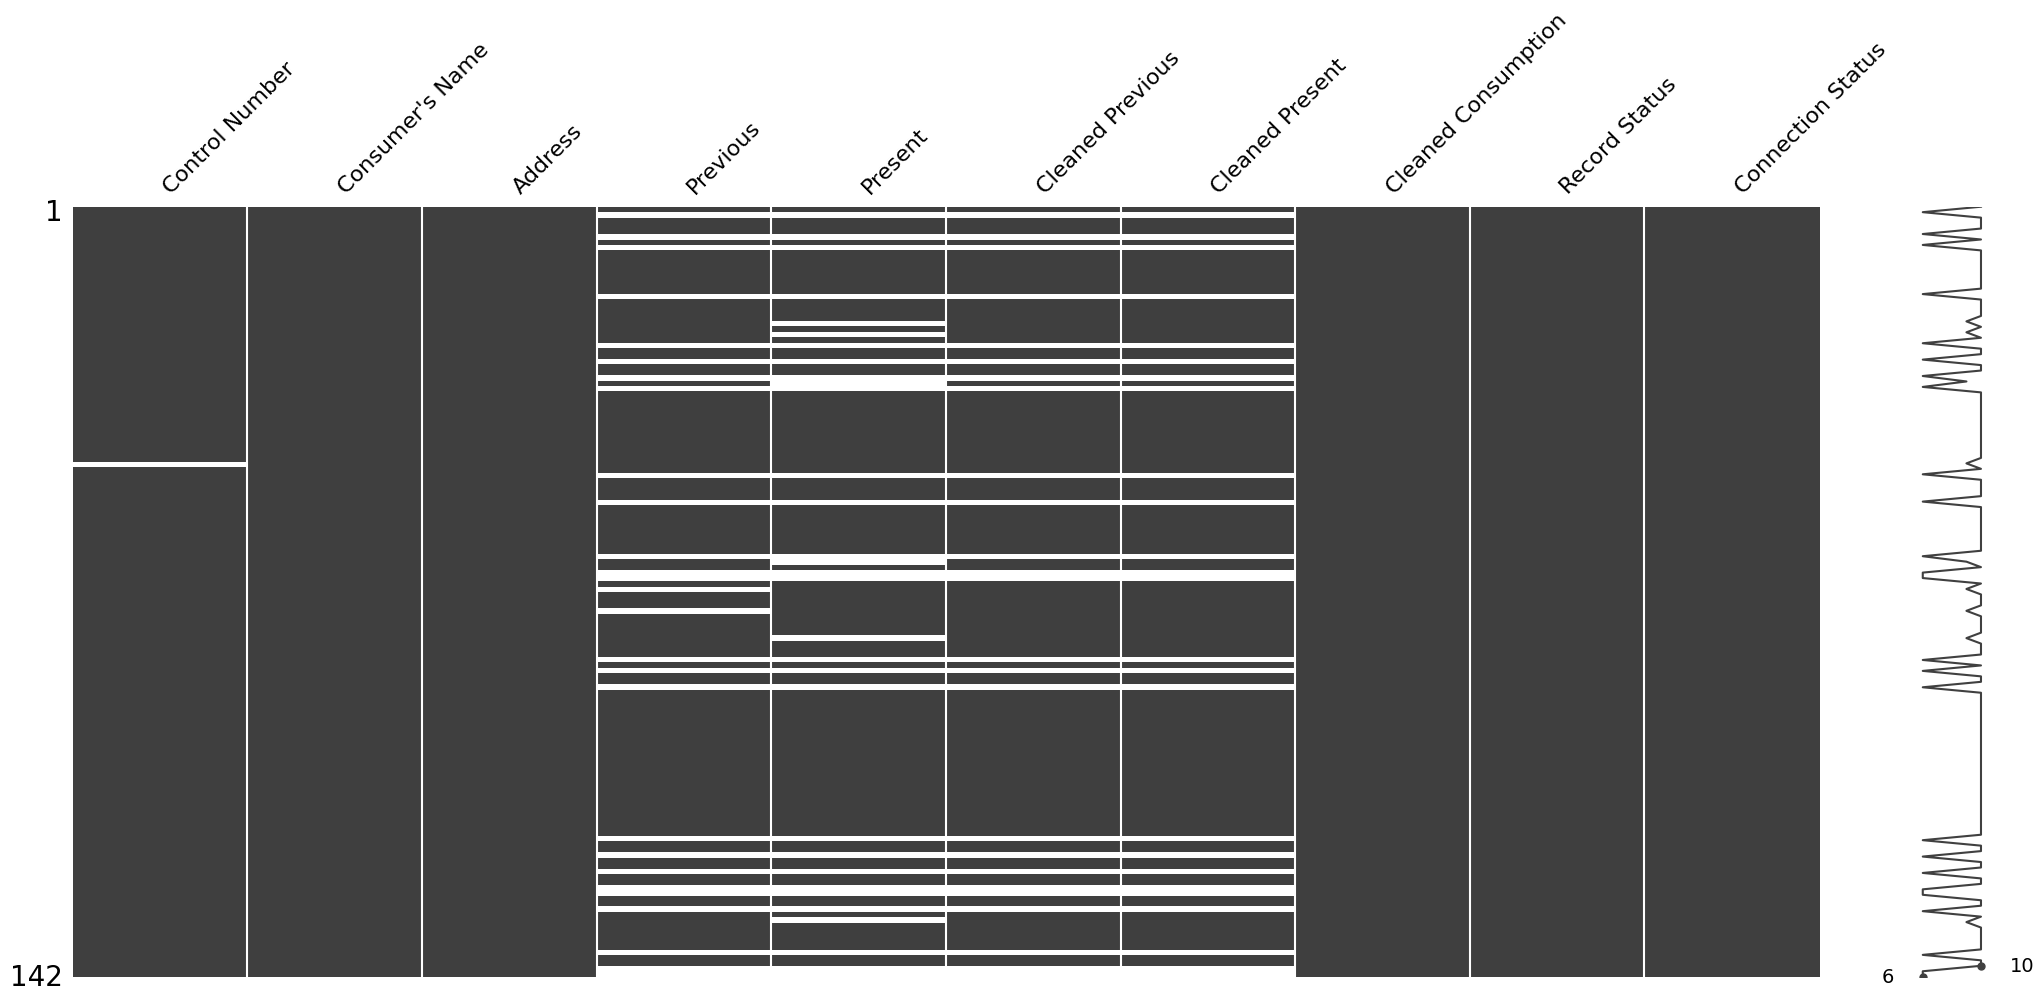

In [2]:
import pandas as pd
import missingno as msno
df = pd.read_csv("../../dataset/preprocessed/2020/JAN2020_preprocessed.csv")
df.info()
display(df['Record Status'].value_counts())

sample_df = df.drop("Water Meter Serial #", axis=1).sample(frac=0.1)
sample_df = sample_df[~sample_df['Record Status'].isin(['Invalid', 'Empty'])]
msno.matrix(sample_df)